## Visualizing the Efffect of Weather on Mosquito Populations

Import data and set date index

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import math
import seaborn as sns

In [3]:
train = pd.read_csv('../Assets/train_cleaned.csv')
weather = pd.read_csv('../Assets/weather_clean.csv')

In [4]:
merged = train.merge(weather, how = 'left', on = ['Station', 'Date'])

In [5]:
merged['Date'] = pd.to_datetime(merged.Date)

In [6]:
merged.set_index('Date', inplace=True)

### EDA on weather data

#### Visualizations: Temperature

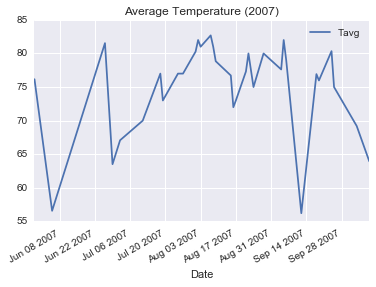

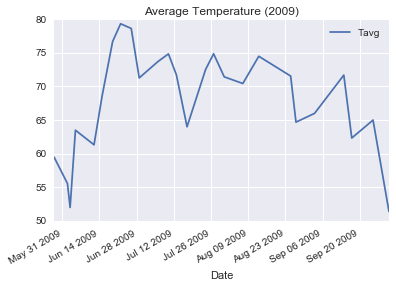

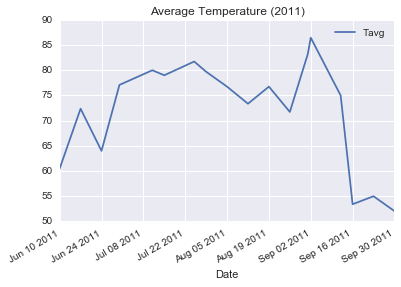

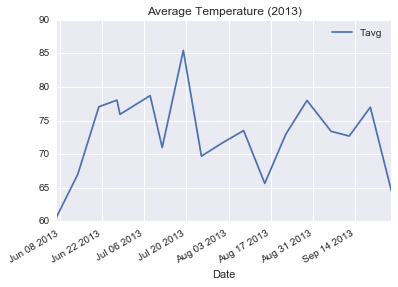

In [16]:
merged.groupby(merged.index, level=0).agg({'Tavg': np.mean})['2007'].plot(title='Average Temperature (2007)')
merged.groupby(merged.index, level=0).agg({'Tavg': np.mean})['2009'].plot(title='Average Temperature (2009)')
merged.groupby(merged.index, level=0).agg({'Tavg': np.mean})['2011'].plot(title='Average Temperature (2011)')
merged.groupby(merged.index, level=0).agg({'Tavg': np.mean})['2013'].plot(title='Average Temperature (2013)')

#### Visualizations: Factors that Affect Number of Mosquitos

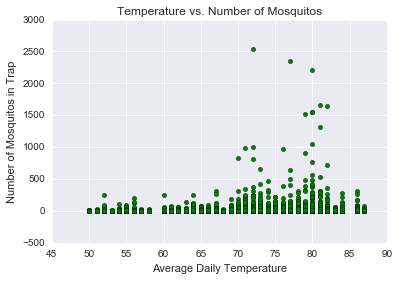

In [8]:
plt.scatter(merged.Tavg, merged.NumMosquitos, c='g')
plt.xlabel('Average Daily Temperature')
plt.ylabel('Number of Mosquitos in Trap')
plt.title('Temperature vs. Number of Mosquitos')

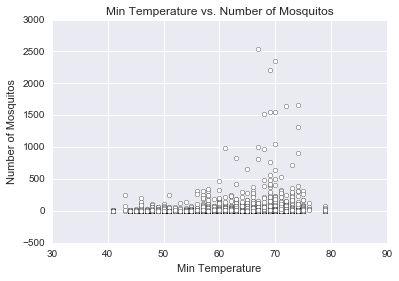

In [9]:
plt.scatter(merged.Tmin, merged.NumMosquitos, c='w')
plt.xlabel('Min Temperature')
plt.ylabel('Number of Mosquitos')
plt.title('Min Temperature vs. Number of Mosquitos')

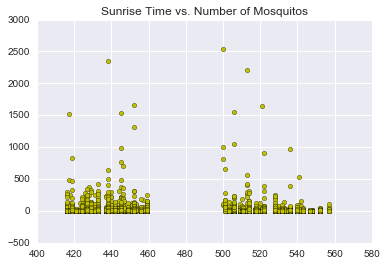

In [10]:
plt.scatter(merged.Sunrise, merged.NumMosquitos, c='y')
plt.title('Sunrise Time vs. Number of Mosquitos')

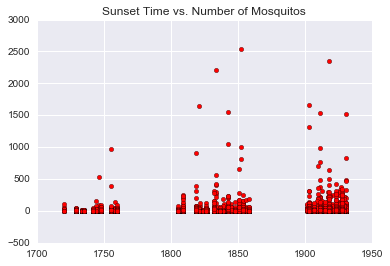

In [11]:
plt.scatter(merged.Sunset, merged.NumMosquitos, c='r')
plt.title('Sunset Time vs. Number of Mosquitos')

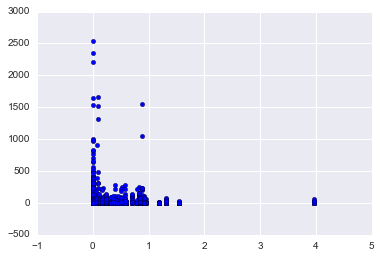

In [12]:
plt.scatter(merged.PrecipTotal, merged.NumMosquitos, c='b')

### Occurrences of WNV over Time

In [13]:
merged_2007 = merged['2007']
merged_2009 = merged['2009']
merged_2011 = merged['2011']
merged_2013 = merged['2013']

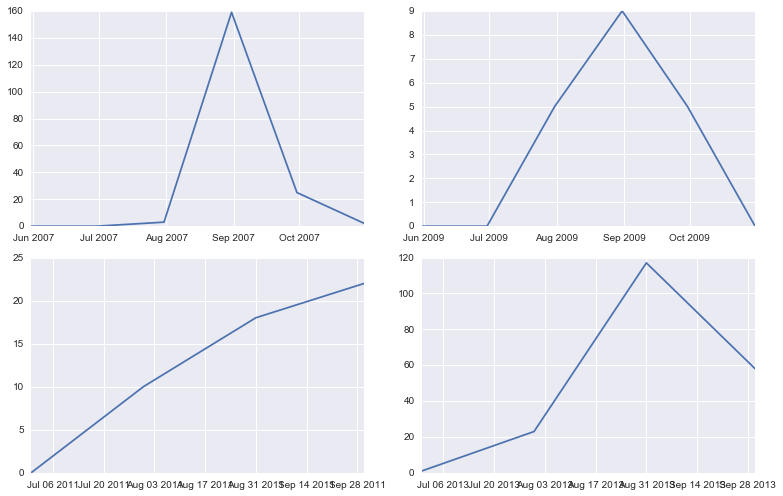

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(11, 7))
ax0, ax1, ax2, ax3 = axes.flat

ax0.plot(merged_2007[['WnvPresent']].resample('M').apply(sum))
ax1.plot(merged_2009[['WnvPresent']].resample('M').apply(sum))
ax2.plot(merged_2011[['WnvPresent']].resample('M').apply(sum))
ax3.plot(merged_2013[['WnvPresent']].resample('M').apply(sum))

plt.tight_layout()